## World Happiness Report

Problem Statement:

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
warnings.simplefilter(action='ignore',category=FutureWarning)

In [45]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [46]:
data.shape

(158, 12)

In [47]:
type(data)

pandas.core.frame.DataFrame

In [48]:
data.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
41,El Salvador,Latin America and Caribbean,42,6.13,0.05618,0.76454,1.02507,0.67737,0.4035,0.11776,0.10692,3.035


In [49]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### About the Columns :-
1. Country - Name of the country.
2. Region - Name of the region in the continent where the country is located.
3. Happiness rank - Rank of the country based on the Happiness Score.
4. Happiness Score - How would people rate their happiness on a scale of 0 to 10 where 10 is the happiest."
5. Standard Error - The extent to which Standard Erro contributes to the calculation of the Happiness Score.
6. Economy (GDP per Capita) - shows a country's GDP divided by its total population. The extent to which GDP contributes to the calculation of the Happiness Score.
7. Family - The extent to which Family contributes to the calculation of the Happiness Score
8. Health (life expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score
9. Freedom - Freedom to make life choices. The extent to which Freedom contributed to the calculation of the Happiness Score.
10. Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score.
11. Generosity - A metric used for showing the act of being generous.

In [50]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<AxesSubplot:>

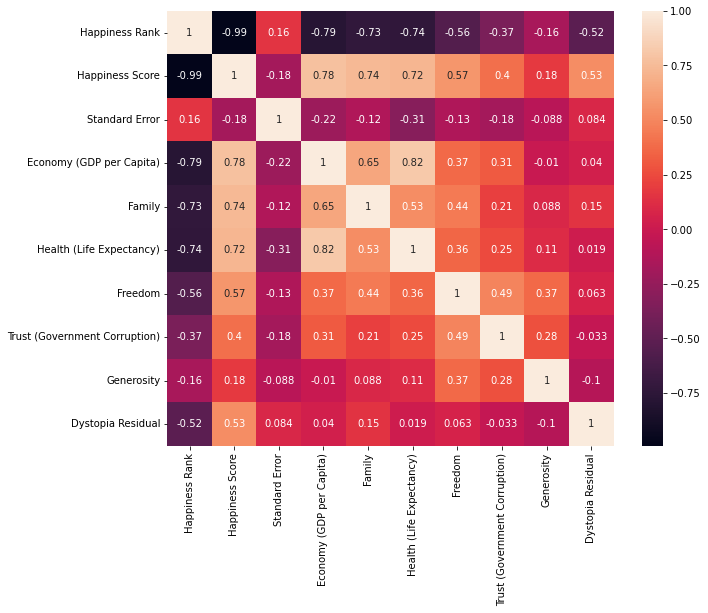

In [52]:
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

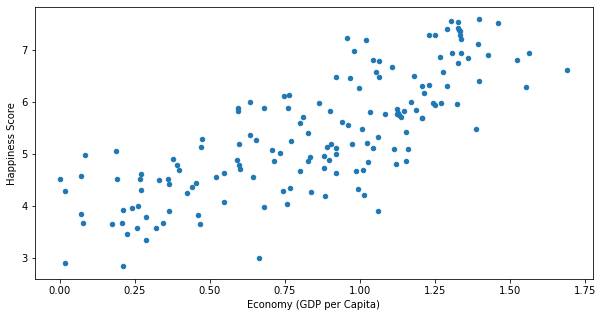

In [53]:
data.plot(kind='scatter',x='Economy (GDP per Capita)',y='Happiness Score',figsize=(10,5))
plt.show()

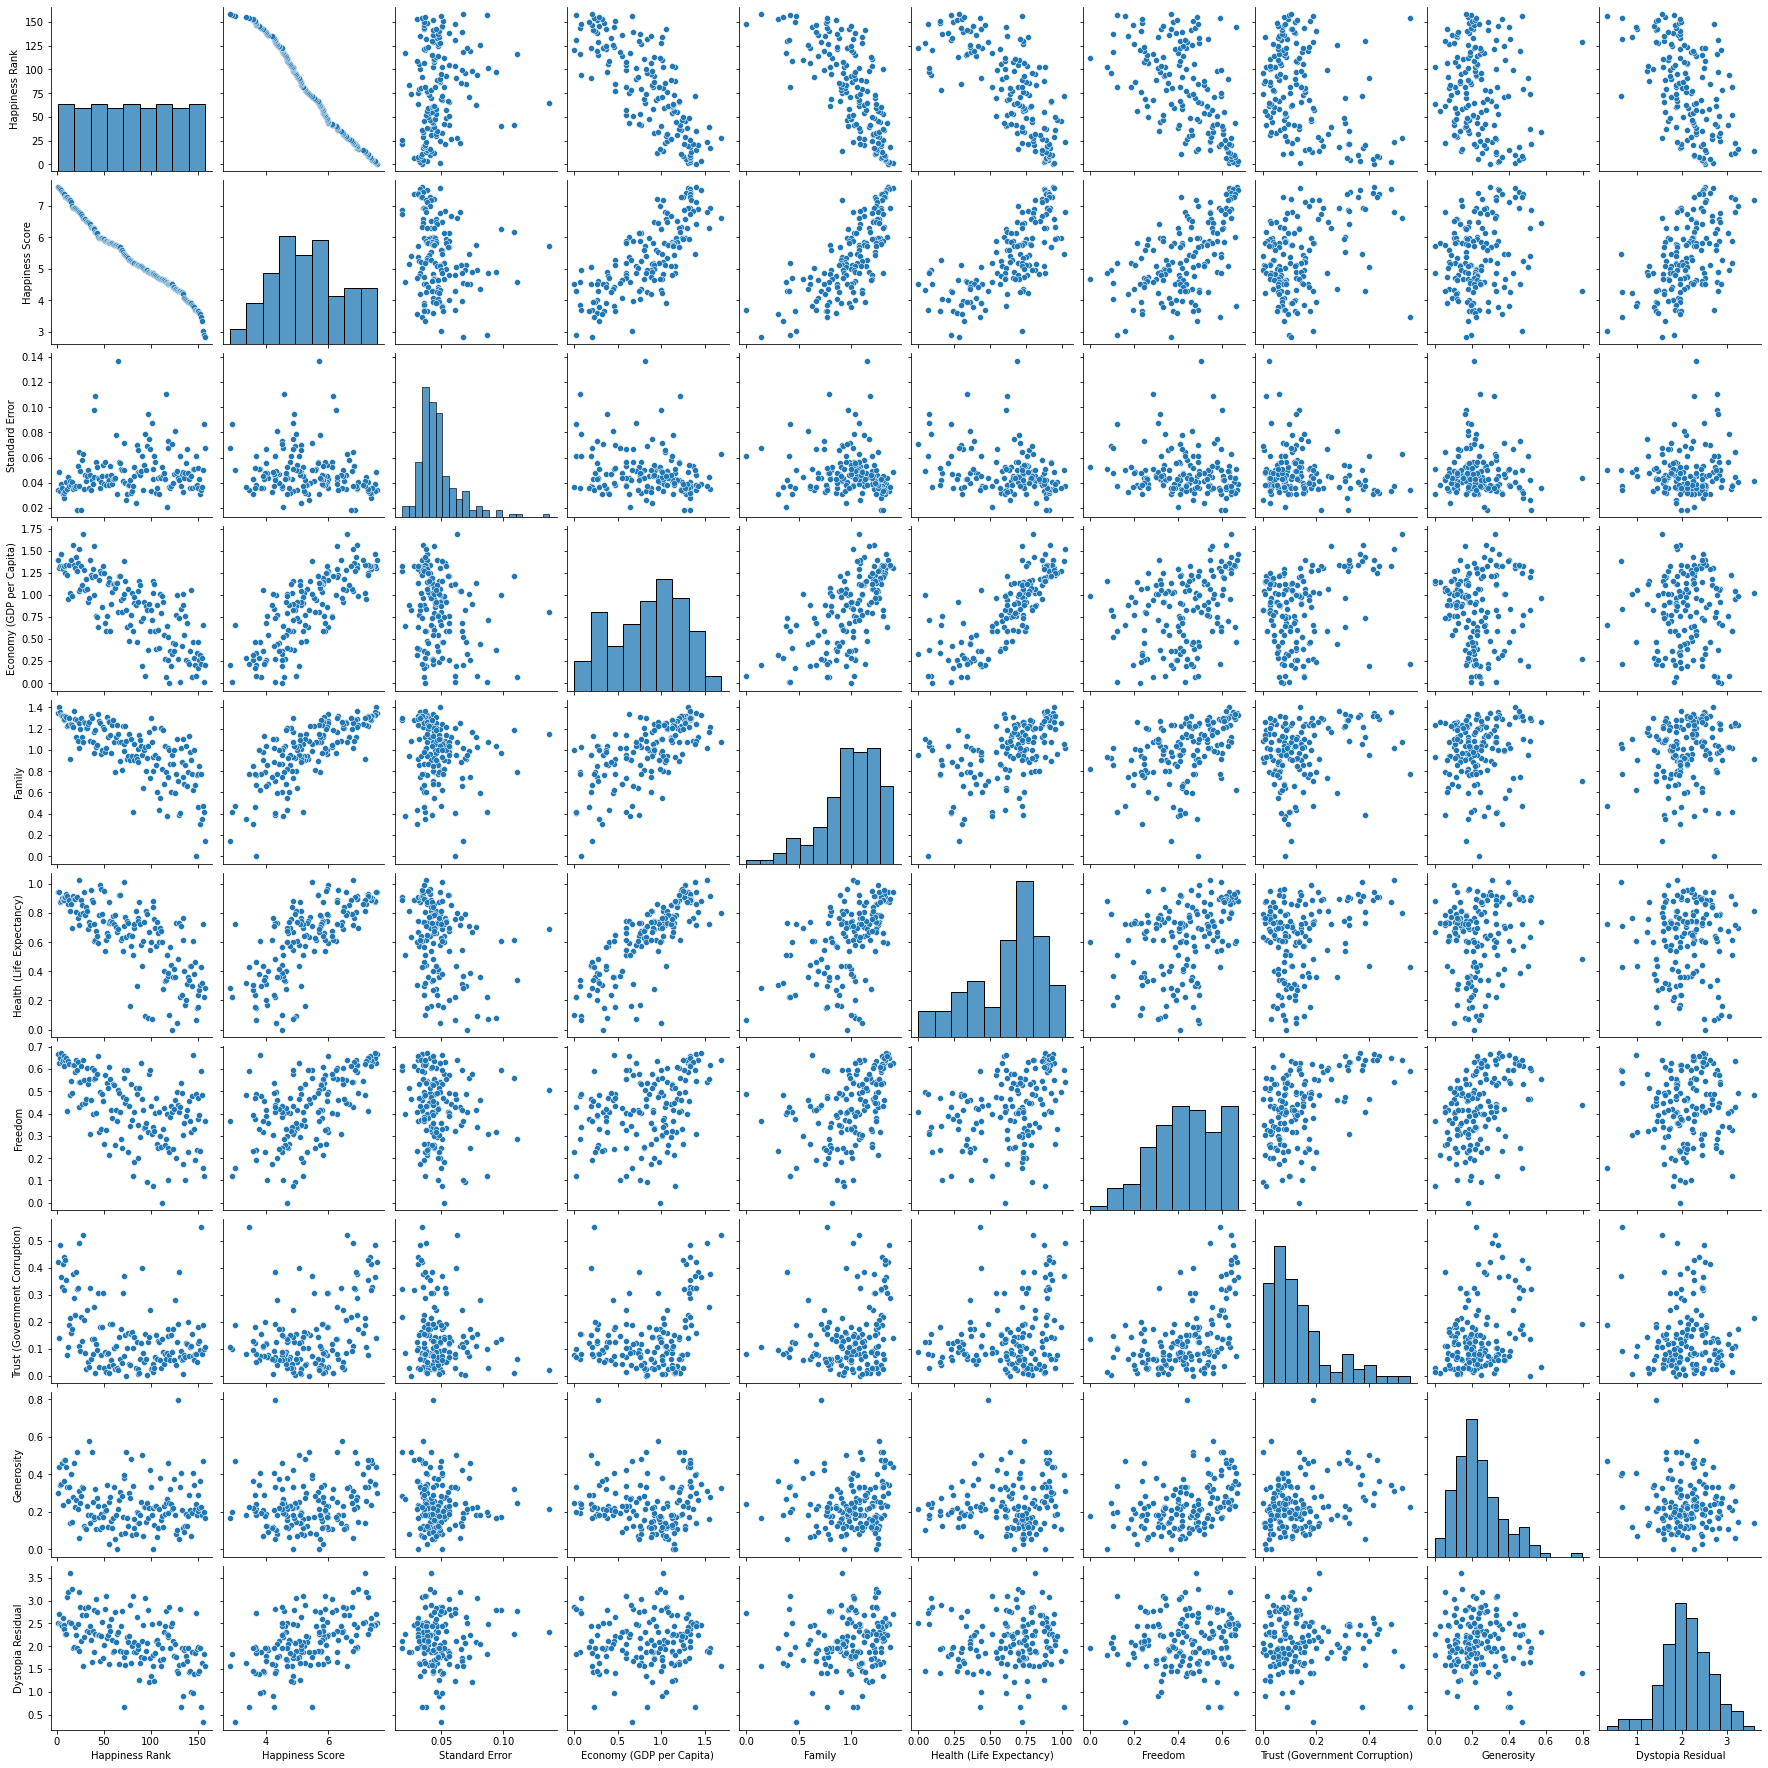

In [54]:
sns.pairplot(data)
plt.show()

In [55]:
data.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [56]:
# remove country from dataset
data=data.drop('Country',axis=1)

In [57]:
data.head(5)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [58]:
# Now encode the region using the label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Region']=le.fit_transform(data['Region'])

data

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [59]:
#checking skewness is present or not
x=data.drop(['Happiness Score'],axis=1)

In [60]:
y=data['Happiness Score']

In [61]:
x.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [62]:
#Family,Standard Error,Trust(Government Corruption), and Generosity have hign skewness in the data set.

In [63]:
#so we have to reduce the skewness by using power transform
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new.skew()
#new skewness after power tranform

Region                          -0.228041
Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

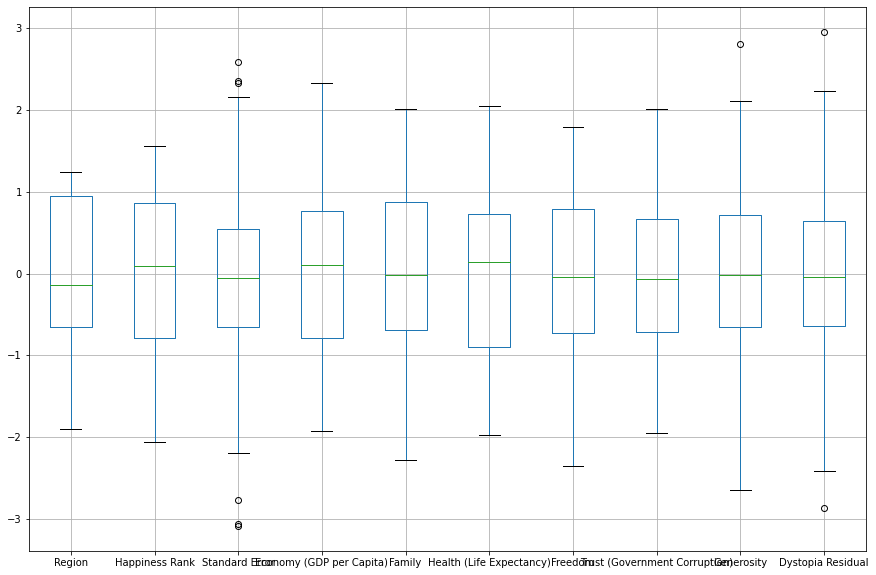

In [64]:
#now we have to check whether any outliers are present in the data for that we use box plot
x_new.boxplot(figsize=(15,10))
plt.show()


In [65]:
from scipy import stats

z= np.abs(stats.zscore(x_new))
z

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.244530,2.063414,0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,1.244530,2.008498,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,1.244530,1.958574,1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,1.244530,1.912062,0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,0.030337,1.868100,0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...,...
153,0.955102,1.490877,0.916014,1.494046,0.959885,0.939459,1.135229,2.012856,0.065304,2.393259
154,0.955102,1.508130,0.719479,1.360829,1.896644,1.276496,0.307514,0.433835,0.334169,0.863565
155,0.303010,1.525352,0.399137,0.513469,1.690664,0.262933,1.668658,0.738915,1.659336,2.866216
156,0.955102,1.542544,1.926902,1.894954,1.796803,1.525700,1.849903,0.151946,0.194829,0.514801


In [66]:
#check any score go beyond threshold 3
print(np.where(z>3))

(array([20, 25], dtype=int64), array([2, 2], dtype=int64))


In [67]:
z

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.244530,2.063414,0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,1.244530,2.008498,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,1.244530,1.958574,1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,1.244530,1.912062,0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,0.030337,1.868100,0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...,...
153,0.955102,1.490877,0.916014,1.494046,0.959885,0.939459,1.135229,2.012856,0.065304,2.393259
154,0.955102,1.508130,0.719479,1.360829,1.896644,1.276496,0.307514,0.433835,0.334169,0.863565
155,0.303010,1.525352,0.399137,0.513469,1.690664,0.262933,1.668658,0.738915,1.659336,2.866216
156,0.955102,1.542544,1.926902,1.894954,1.796803,1.525700,1.849903,0.151946,0.194829,0.514801


In [68]:
x_new = x_new[(z<3).all(axis=1)]
x_new.shape

(156, 10)

In [69]:
# standardize the data using power transform
y =y[(z<3).all(axis=1)]
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_new=scale.fit_transform(x_new)

In [70]:
#Now find the best random state  
from sklearn.linear_model import LinearRegression # importing our model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # for checkig our model accuracy
maxAccu = 0
maxRS = 0
lr = LinearRegression()
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = .10, random_state = i)
    
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.9986671722465845  on Random State  89


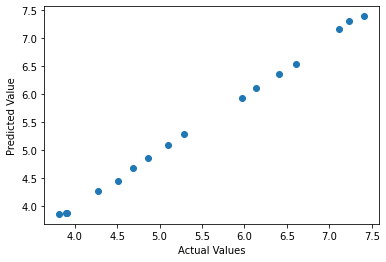

0.9986671722465845
Error
Mean Sqaured error = 0.0019650422695914106
Root mean squared error= 0.044328797294664005


In [71]:
# slipt the data using best random sate=89 and Linear Regressiong using it
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = .10, random_state = 89)
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
#Now  polt the actual Y and predicted y
plt.scatter(y_test,pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.show()
# also check mean squared error and abolute mean squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(r2_score(y_test, pred))
print("Error")
print("Mean Sqaured error =",mean_squared_error(y_test,pred))
print("Root mean squared error=",np.sqrt(mean_squared_error(y_test,pred)))

### Our model is scored good accuracy.  Linear regression is giving the best result to be use in this problem.